<h2 align="center">INF575 - Fuzzy Logic</h2>
<h1 align="center">Segmentation of HER2 Overexpression in Histopathology Images with Fuzzy Decision Tree<h1>
    
<center>
    <img src="https://rochepacientes.es/content/dam/roche-pacientes-2/es/assets/images/que-es-her2.jpg" width="60%"/>
</center>

<h2 align="center">Classic Decision Tree</h2>

<center>
<i> Sebastián Bórquez G. - <a href="mailto://sebastian.borquez.g@gmail.com">sebastian.borquez.g@gmail.com</a> - DI UTFSM - August 2020.</i>
</center>

In [1]:
%cd ..

/mnt/d/sebas/Desktop/her2_FL


In [2]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(palette="muted")
from IPython.display import display, HTML

from load_features import *

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

In [3]:
selected_features = [
 'mean_rawblue', 
 'mean_dab',
 'mean_intentsity',
 'mean_rawgreen',
 'mean_eosin',
 'mean_vertical',
 'mean_rawbred',
 'homogeneity_vertical',
 'mean_hematoxylin',
 'sobel_magnitud'
]

In [4]:
train_csv_files = [
    "./data/1+_2.csv",
    "./data/1+_20.csv",
    "./data/2+_1.csv",
    "./data/2+_8.csv",
    "./data/3+_16.csv",
    "./data/3+_15.csv",
]
train_features = merge_features([load_features(csv_file, selected_features=selected_features) for csv_file in train_csv_files])
(feature_names, target_col), (train_X, train_y) = split_features_target(train_features)

test_csv_files = [
    "./data/1+_25.csv",
    "./data/2+_9.csv",
    "./data/3+_15.csv",
]
test_features = merge_features([load_features(csv_file, selected_features=selected_features) for csv_file in test_csv_files])
test_X, test_y = split_features_target(test_features)

In [6]:
# Parameters
class_weight = {0: 1., 1: 20.}
min_samples_leaf = 15
max_depth=5

## Train

In [7]:
# Train
clf = DecisionTreeClassifier(class_weight=class_weight, min_samples_leaf=min_samples_leaf).fit(train_X, train_y)

In [8]:
# Train
rf = RandomForestClassifier(n_estimators=30, class_weight=class_weight, min_samples_leaf=min_samples_leaf).fit(train_X, train_y)

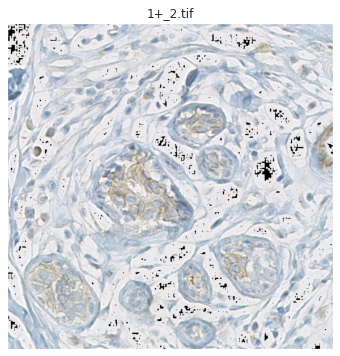

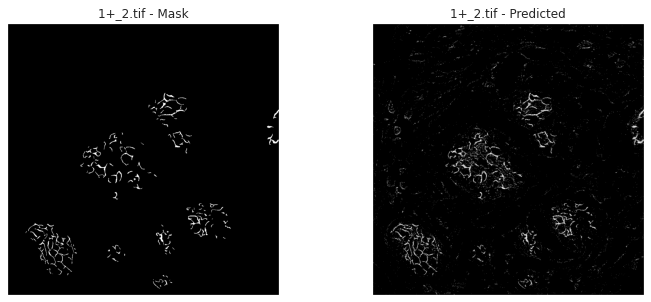

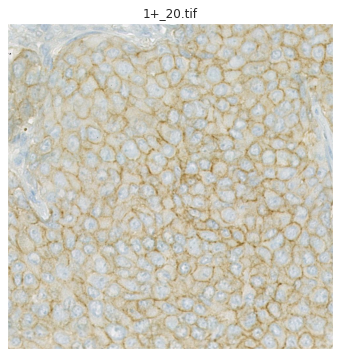

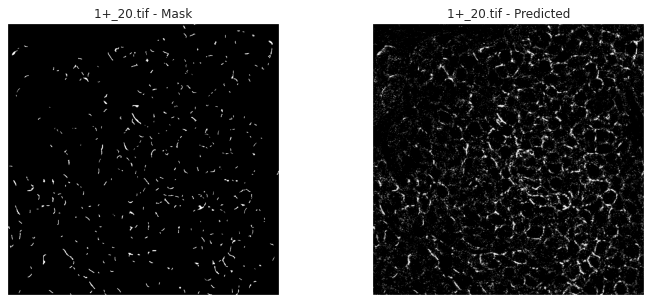

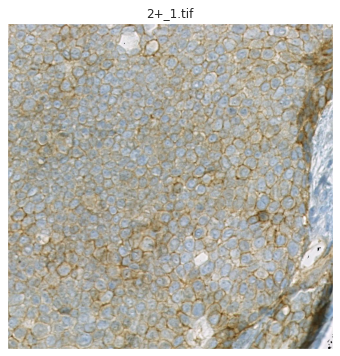

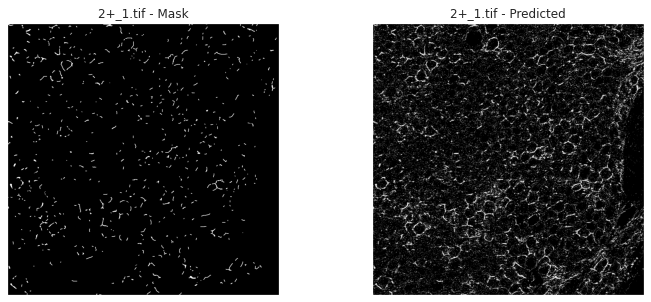

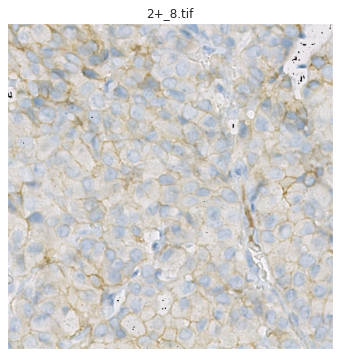

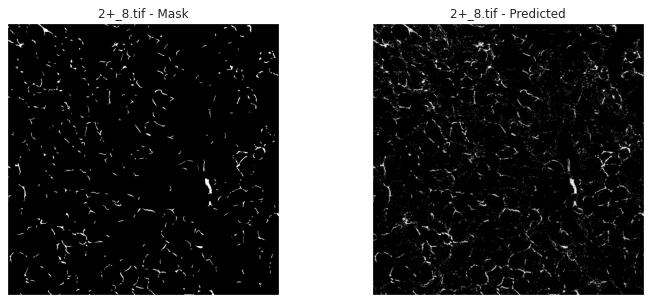

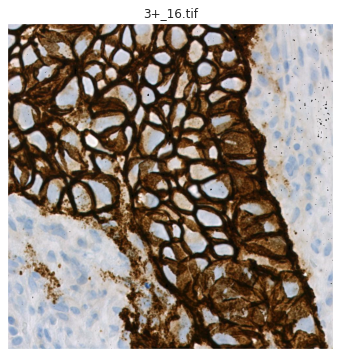

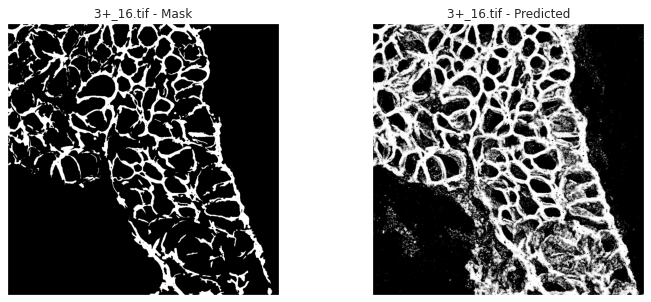

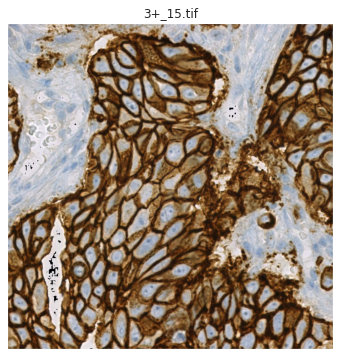

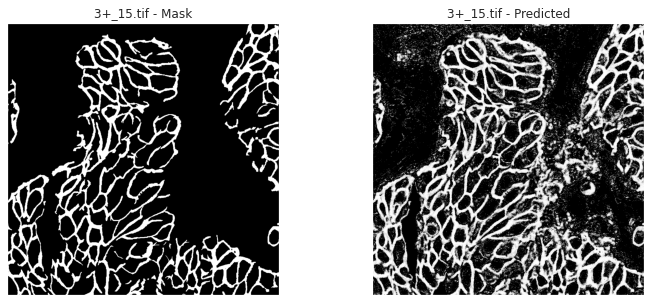

In [9]:
train_images = train_features.image.unique()
for train_image in train_images:
    image_features = train_features[train_features.image == train_image]
    X_i, y_i = split_features_target(image_features, True)
    predicted = clf.predict_proba(X_i)[:,1]
    show_images_and_masks(train_image, image_features, predicted)

<BarContainer object of 10 artists>

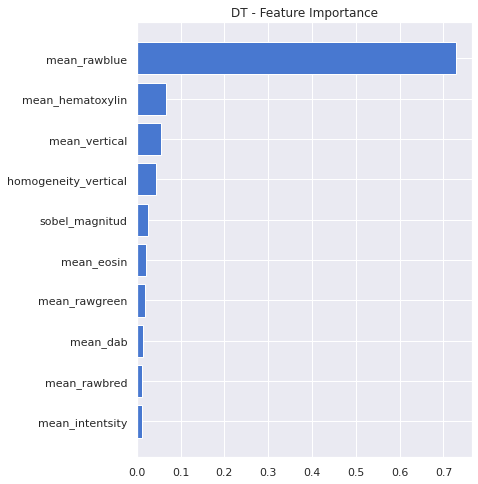

In [10]:
index=np.argsort(clf.feature_importances_,)
plt.figure(figsize=(6,8))
plt.title('DT - Feature Importance')
plt.barh(np.arange(len(clf.feature_importances_)), clf.feature_importances_[index], tick_label=np.array(feature_names)[index])

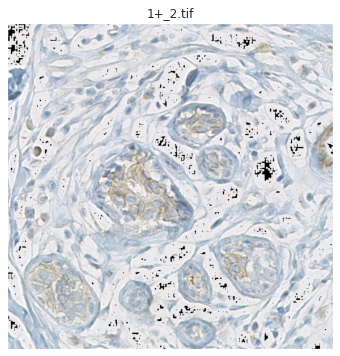

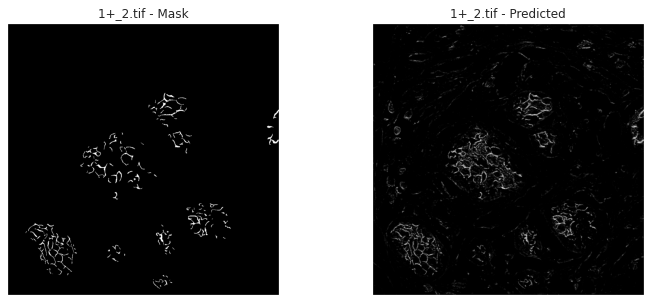

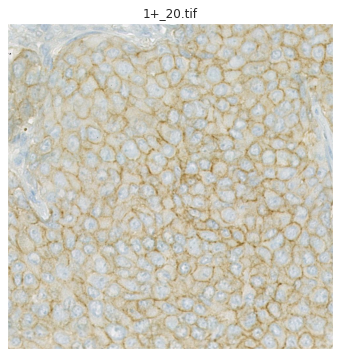

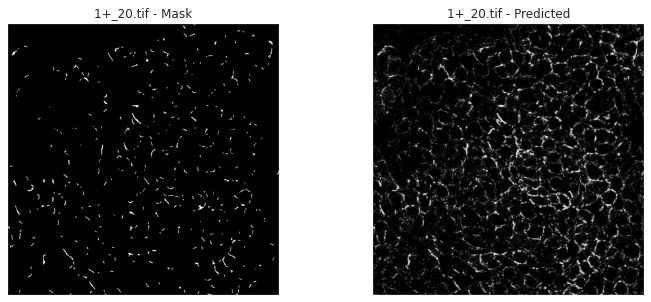

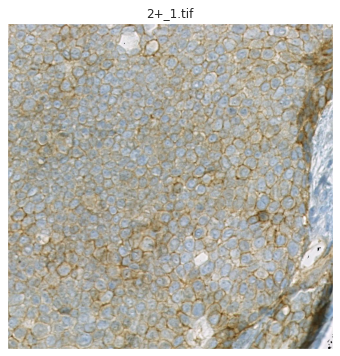

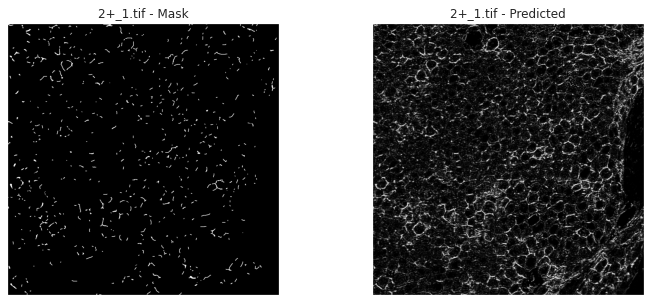

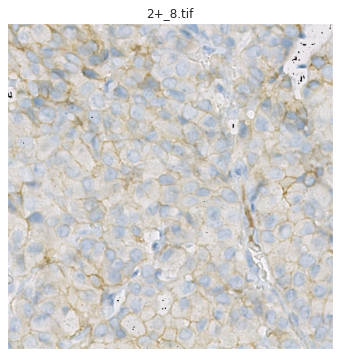

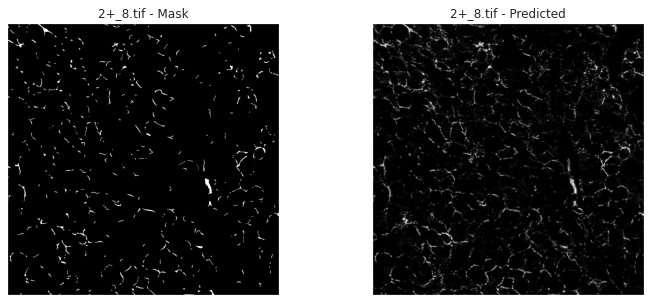

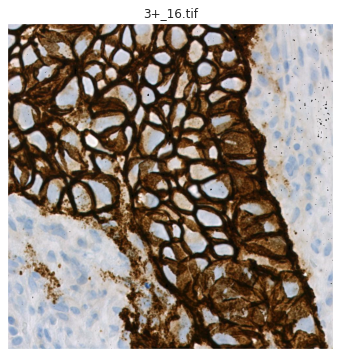

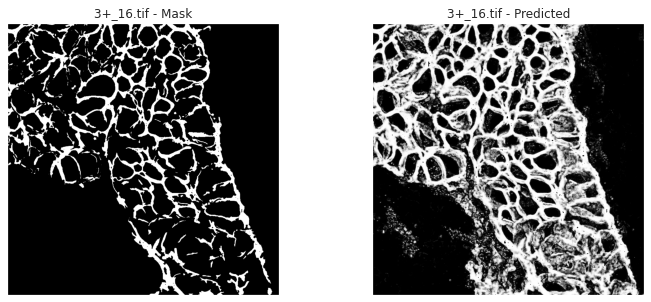

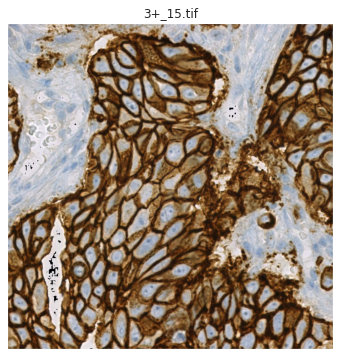

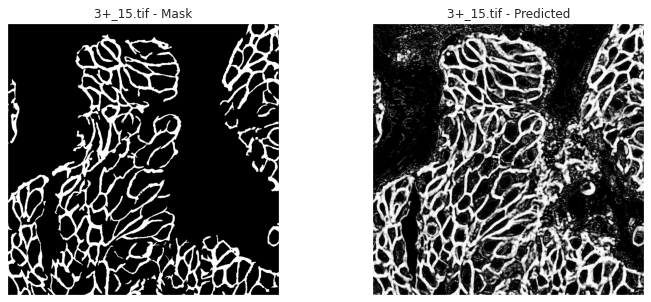

In [11]:
train_images = train_features.image.unique()
for train_image in train_images:
    image_features = train_features[train_features.image == train_image]
    X_i, y_i = split_features_target(image_features, True)
    predicted = rf.predict_proba(X_i)[:,1]
    show_images_and_masks(train_image, image_features, predicted)

<BarContainer object of 10 artists>

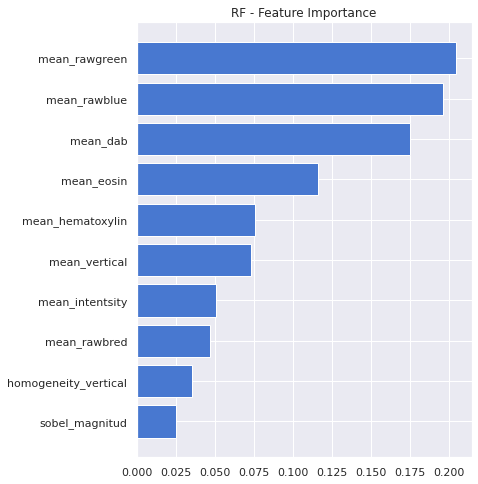

In [12]:
index=np.argsort(rf.feature_importances_)
plt.figure(figsize=(6,8))
plt.title('RF - Feature Importance')
plt.barh(np.arange(len(rf.feature_importances_)), rf.feature_importances_[index], tick_label=np.array(feature_names)[index])

## Test

In [13]:
test_images = test_features.image.unique()
true_targets = []
for test_image in test_images:
    image_features = test_features[test_features.image == test_image]
    _, test_y_i = split_features_target(image_features, True)
    true_targets.append(test_y_i)
true_targets = np.hstack(true_targets)

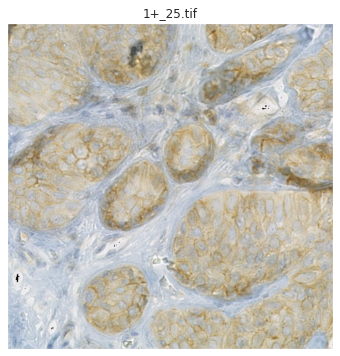

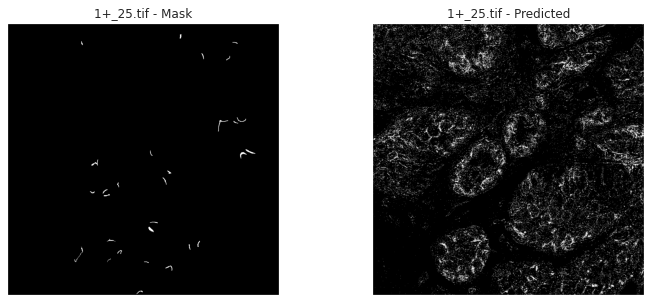

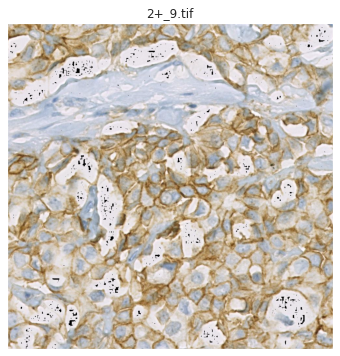

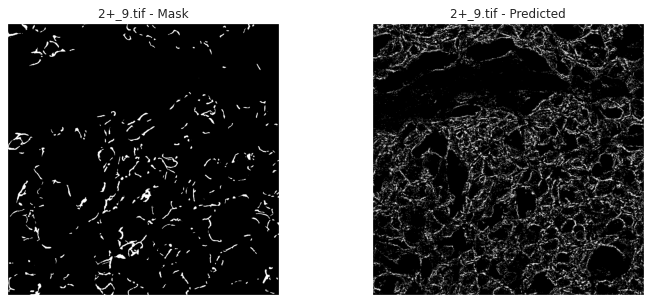

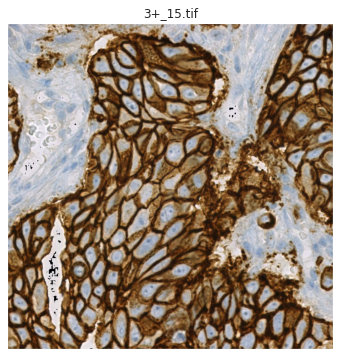

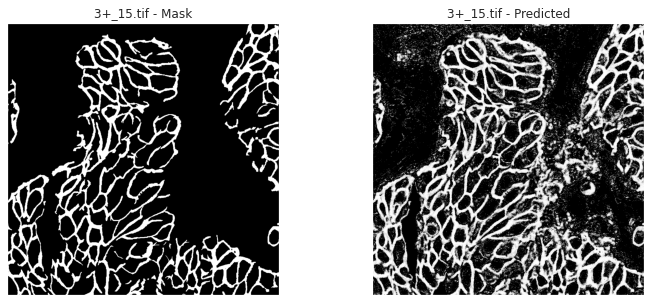

In [14]:
test_images = test_features.image.unique()
dt_predicted = []
for test_image in test_images:
    image_features = test_features[test_features.image == test_image]
    test_X_i, test_y_i = split_features_target(image_features, True)
    dt_predicted_i = clf.predict_proba(test_X_i)[:,1]
    dt_predicted.append(dt_predicted_i)
    show_images_and_masks(test_image, image_features, dt_predicted_i)
dt_predicted = np.hstack(dt_predicted)

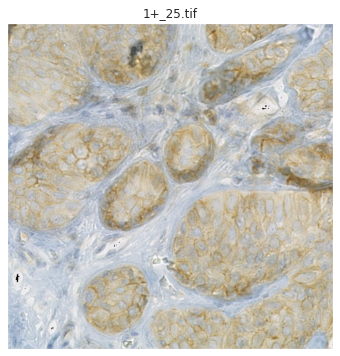

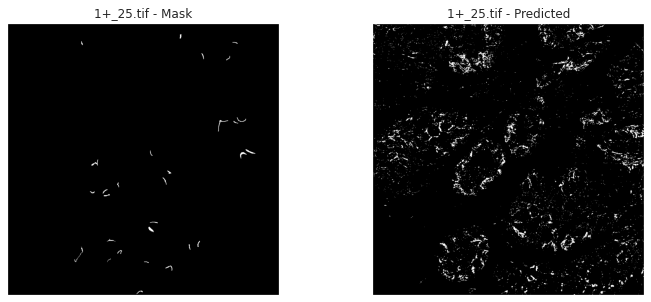

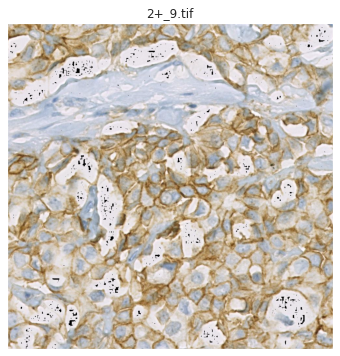

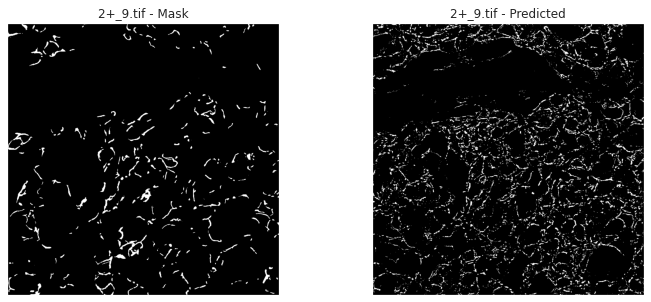

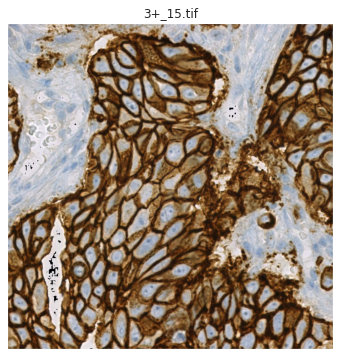

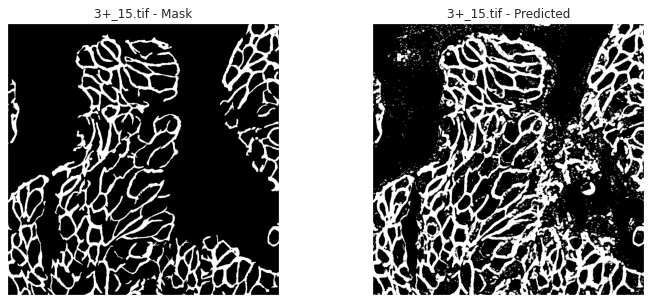

In [15]:
test_images = test_features.image.unique()
rf_predicted = []
for test_image in test_images:
    image_features = test_features[test_features.image == test_image]
    test_X_i, test_y_i = split_features_target(image_features, True)
    #predicted = rf.predict_proba(test_X_i)[:,1]
    rf_predicted_i = rf.predict(test_X_i)
    rf_predicted.append(rf_predicted_i)
    show_images_and_masks(test_image, image_features, rf_predicted_i)
rf_predicted = np.hstack(rf_predicted)

In [16]:
results = pd.DataFrame({
    "target": true_targets,
    "decision tree": dt_predicted.astype(int),
    "random forest": rf_predicted.astype(int)
})
results.to_csv("crisp_results.csv", index=False)

In [17]:
from sklearn.metrics import classification_report

print("Decision Tree")
print(classification_report(results["target"], results["decision tree"], target_names=["non-overexpression", "overexpression"]))


print("Random Forest")
print(classification_report(results["target"], results["random forest"], target_names=["non-overexpression", "overexpression"]))

Decision Tree
                    precision    recall  f1-score   support

non-overexpression       0.93      1.00      0.96   2781471
    overexpression       0.97      0.04      0.08    211306

          accuracy                           0.93   2992777
         macro avg       0.95      0.52      0.52   2992777
      weighted avg       0.93      0.93      0.90   2992777

Random Forest
                    precision    recall  f1-score   support

non-overexpression       0.99      0.92      0.95   2781471
    overexpression       0.46      0.87      0.60    211306

          accuracy                           0.92   2992777
         macro avg       0.72      0.89      0.78   2992777
      weighted avg       0.95      0.92      0.93   2992777

